# Actividade 2: Espectroscopia de rochas

Neste notebook vamos tentar encontrar elementos em amostras de rochas, previamente analisadas no LIBS numa média de um total de 10 disparos em diversas zonas da amostra. Na primeira célula carregamos as funções necessárias: 

In [1]:
#importar as duas bibliotecas já introduzidas no passado
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np

#importar outras bibliotecas necessárias para as funções que vamos definir
import requests
import re


def read_libs_data(filename):
  """
  Função usada para ler dados de ficheiros do LIBS fornecidos.
  Retorna wavelenghts, intensidades
  """
  data = np.loadtxt(filename)
  return data[:,0], data[:,1]/np.max(data[:,1])

def scrap_element(element):
  """
  Função usada para aceder a espectros de elementos da base de dados da NIST.
  Retorna wavelenghts, intensidades normalizadas
  """

  URL = "https://physics.nist.gov/cgi-bin/ASD/lines1.pl?composition="+element+"%3A100&mytext%5B%5D="+element+"&myperc%5B%5D=100&spectra="+element+"0-2&low_w=300&limits_type=0&upp_w=900&show_av=2&unit=1&resolution=2000&temp=1&eden=1e17&maxcharge=2&min_rel_int=0.01&libs=1"
  page = requests.get(URL)

  lista = page.text.split('var dataDopplerArray=')[1].split(';')[0].replace('],',']').replace('null','0').split('\n')[1:]
  
  x = []
  y = []
  for i in lista:
    x.append(float(i.replace('[','').replace(']','').split(",")[0]))
    y.append(float(i.replace('[','').replace(']','').split(",")[1]))

  return x,y/np.max(y)

Estamos agora em condições de avançar. Nas primeiras 2 amostras (rock_1, rock_2) sabemos que existem os seguintes elementos:
  
---
> Fe $~~~~~~~~~~~$ Li $~~~~~~~~~~~$ Al 
---

O vosso objectivo é confirmar a presença destes elementos. Para o fazer vamos comparar o espectro obtido do solo com as linhas/zonas mais importantes de cada elemento

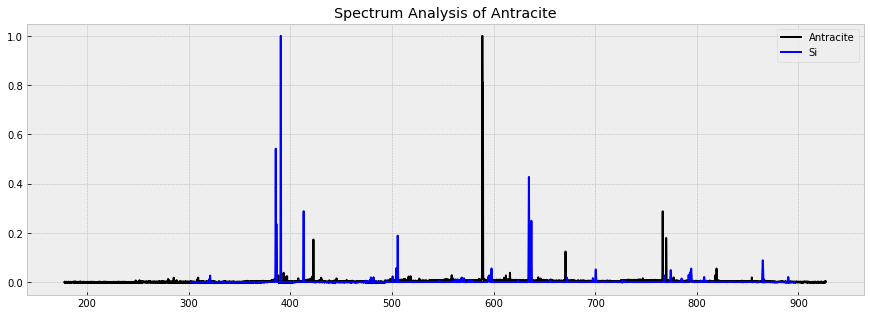

In [4]:
#ler o ficheiro do solo_1
wavelengths_rock_1, spectrum_rock_1 = read_libs_data('Antracite.txt')

#espectro do Ferro
element = "Si"
x,y = scrap_element(element)

#plot dos dados
plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Antracite")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Antracite')
plt.plot(x,y,label='Si',color='b')
plt.legend()
#plt.xlim((620,660))